<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Exercise 2 part 1 and 2!

In [96]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [97]:
#Part 1- Transmission

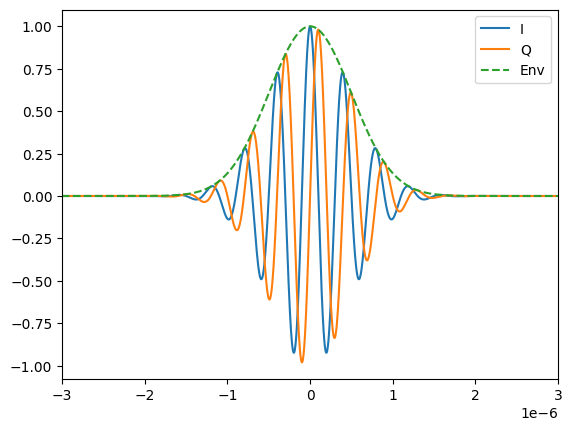

In [98]:


#Defining variables

fs = 250e6
f0 = 2.5e6
bw = 0.3
bw_abs = f0*bw
T = 10e-6
N = int(T*fs)
t_vec = (np.arange(N) - N/2) / fs

#Generating the gauss pulse and plotting it

i, q, e = signal.gausspulse(t_vec, bw=bw, fc=f0, retquad = True, retenv = True)

plt.plot(t_vec, i, label = "I")
plt.plot(t_vec, q,label = "Q")
plt.plot(t_vec, e, "--" ,label = "Env")
plt.xlim(-3e-6,3e-6)
plt.legend()
plt.show()



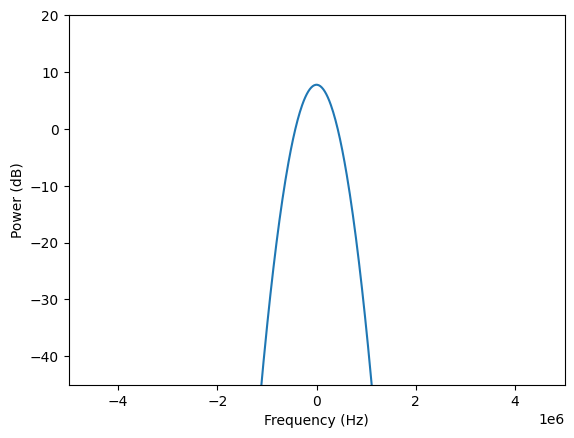

In [99]:
# Power spectrum of the gaussian pulse

Nfft = 16384
Y = np.fft.fft(e, Nfft)
Ps_Y = (1/Nfft) * np.abs(Y)**2
Ps_Y_shiftet = np.fft.fftshift(Ps_Y)
Ps_Y_shiftet_dB = 10*np.log10(Ps_Y_shiftet + 1e-12)
f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fs))

plt.plot(f, Ps_Y_shiftet_dB)
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylim(-45, 20)
plt.xlim(-5e6, 5e6)
plt.show()

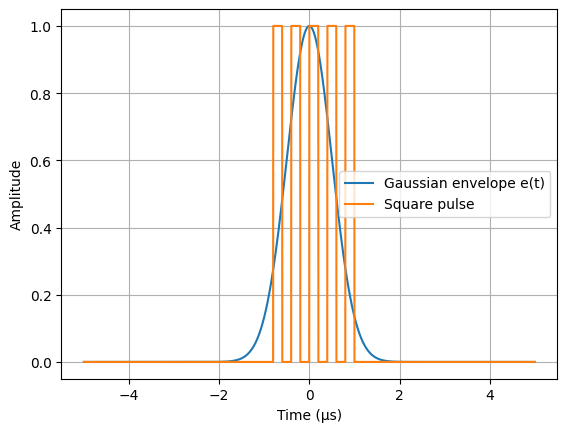

In [100]:
# Generating a square wave
# Square pulse length in samples: use same T as Gaussian
N_sq = N
t_sq = t_vec # already centered around 0

pulse_width = 2e-6
window = np.zeros_like(t_vec)
window[np.abs(t_vec) <= pulse_width/2] = 1
y_square = (signal.square(2*np.pi*f0*t_sq)+1)/2
y_squared_windowed = y_square * window

plt.figure()
plt.plot(t_vec*1e6, e, label="Gaussian envelope e(t)") # or plot i / q if you want
plt.plot(t_vec*1e6, y_squared_windowed, label="Square pulse")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

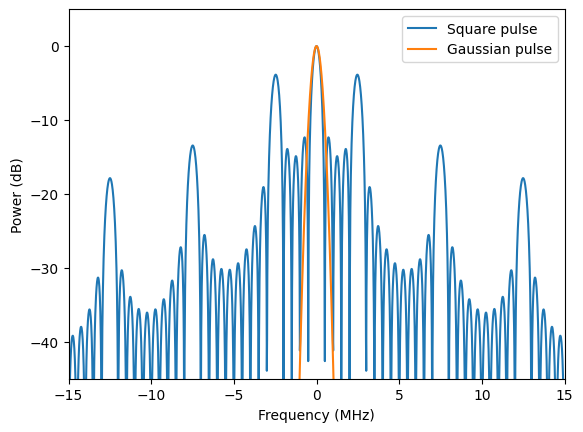

In [101]:
Nfft = 16384
Y_square = np.fft.fft(y_squared_windowed, Nfft)

Ps_Y_square = (1/Nfft) * np.abs(Y_square)**2
Ps_Y_square_shiftet = np.fft.fftshift(Ps_Y_square)
Ps_Y_normalized = Ps_Y_square_shiftet/np.max(Ps_Y_square_shiftet)
Ps_gauss_normalized = Ps_Y_shiftet/np.max(Ps_Y_shiftet)
Ps_Y_square_shiftet_dB = 10*np.log10(Ps_Y_normalized + 1e-12)
Ps_gauss_shifted_dB = 10*np.log10(Ps_gauss_normalized + 1e-12)


plt.figure()

plt.plot(f/1e6, Ps_Y_square_shiftet_dB, label="Square pulse")
plt.plot(f/1e6, Ps_gauss_shifted_dB, label="Gaussian pulse")
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")
plt.ylim(-45, 5)
plt.xlim(-15, 15)
plt.legend()
plt.show()

In [102]:
#The main difference one can observe in the plot is that the gaussian pulse spectrum has one main lobe centered
# At 0Hz while the square wave has a main lobe also, but also contains side lobes in +- f0, 3f0, 5f0....

In [103]:
#SPL(Spatial pulse length) of gaussian

c = 1540  # m/s

env = np.abs(e)
env = env / np.max(env)

half = 0.5
idx_max = np.argmax(env)

# indices where envelope is above half-max
above = np.where(env >= half)[0]

i_left = above[0]
i_right = above[-1]

t_left = t_vec[i_left]
t_right = t_vec[i_right]

FWHM_time = t_right - t_left  # seconds

SPL_mm = (c * FWHM_time) * 1e3            # one-way spatial pulse length
radial_res_mm = (c * FWHM_time / 2) * 1e3 # axial/radial resolution (round-trip)

print(f"FWHM time: {FWHM_time*1e6:.3f} µs")
print(f"SPL: {SPL_mm:.3f} mm")
print(f"Radial (axial) resolution: {radial_res_mm:.3f} mm")




FWHM time: 1.168 µs
SPL: 1.799 mm
Radial (axial) resolution: 0.899 mm


In [104]:
#Transducer impulse/freq response

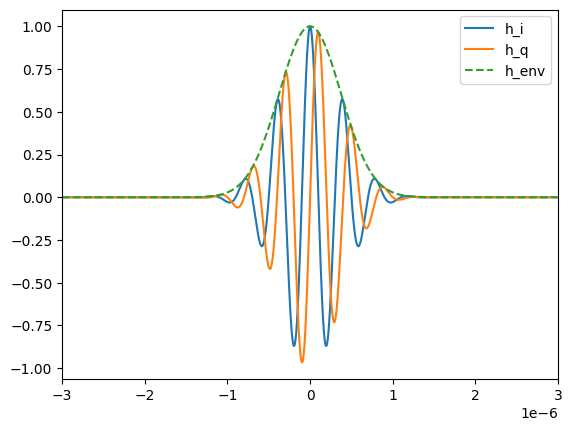

In [105]:
f_xd = 2.5e6
bw_xd = 0.4

h_i, h_q, h_env = signal.gausspulse(t_vec, bw=bw_xd, fc=f_xd, retquad = True, retenv = True)

plt.plot(t_vec, h_i, label = "h_i")
plt.plot(t_vec, h_q,label = "h_q")
plt.plot(t_vec, h_env, "--" ,label = "h_env")
plt.xlim(-3e-6,3e-6)
plt.legend()
plt.show()

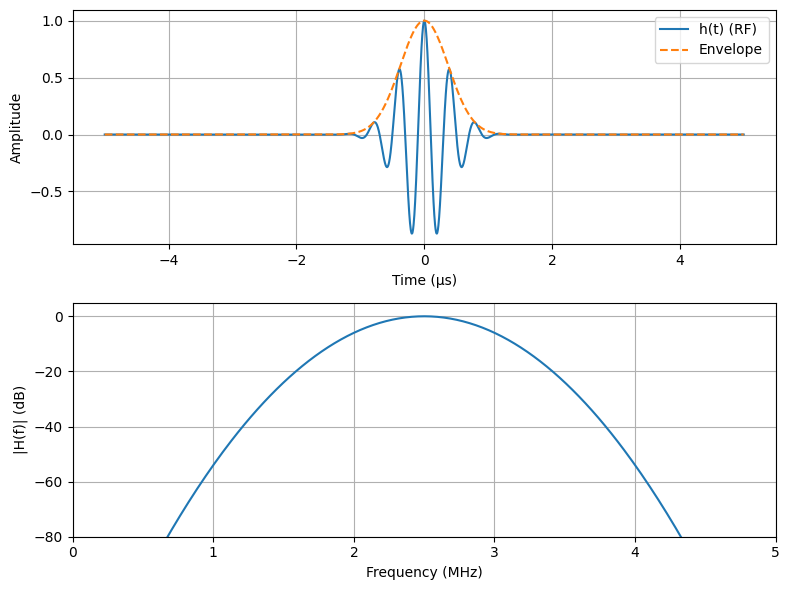

In [106]:
Nfft = 16384
f = np.fft.fftshift(np.fft.fftfreq(Nfft, d=1/fs))

H = np.fft.fftshift(np.fft.fft(h_i, Nfft))
H_mag = np.abs(H)
H_mag = H_mag / np.max(H_mag)
H_dB = 20*np.log10(H_mag + 1e-12)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Time-domain impulse response
ax[0].plot(t_vec*1e6, h_i, label="h(t) (RF)")
ax[0].plot(t_vec*1e6, h_env, '--', label="Envelope")
ax[0].set_xlabel("Time (µs)")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)
ax[0].legend()

# Frequency response magnitude
ax[1].plot(f/1e6, H_dB)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("|H(f)| (dB)")
ax[1].set_ylim(-80, 5)
ax[1].set_xlim(0, 5)
ax[1].grid(True)

plt.tight_layout()
plt.show()


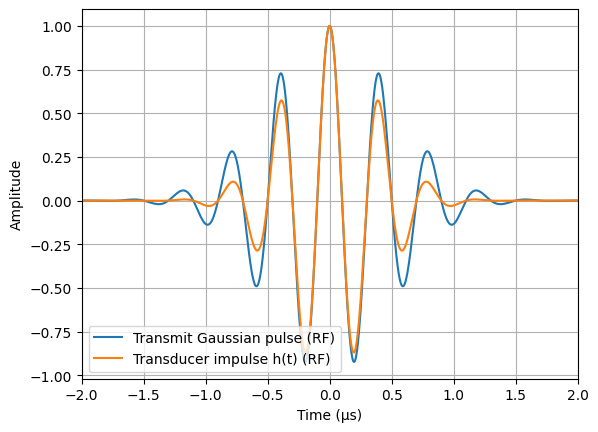

In [107]:
plt.figure()
plt.plot(t_vec*1e6, i, label="Transmit Gaussian pulse (RF)")
plt.plot(t_vec*1e6, h_i, label="Transducer impulse h(t) (RF)")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.xlim(-2,2)
plt.grid(True)
plt.legend()
plt.show()


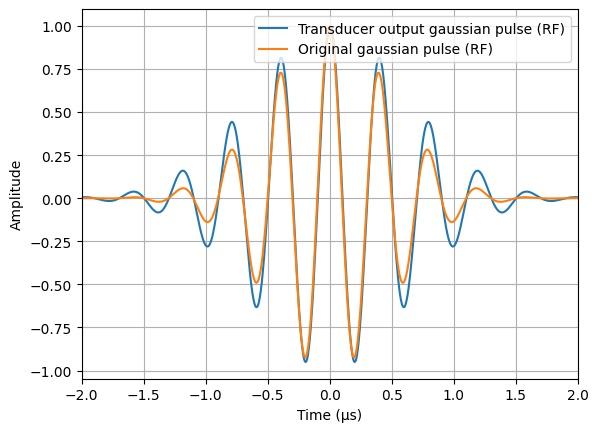

In [108]:
#Convolving the transmit pulse (gaussian) with the impulse response of the filter

conv_sig = np.convolve(i, h_i, mode='same')
conv_sig_norm = conv_sig / np.max(np.abs(conv_sig))


plt.figure()
plt.plot(t_vec*1e6, conv_sig_norm, label="Transducer output gaussian pulse (RF)")
plt.plot(t_vec*1e6, i, label="Original gaussian pulse (RF) ")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.xlim(-2,2)
plt.grid(True)
plt.legend()
plt.show()

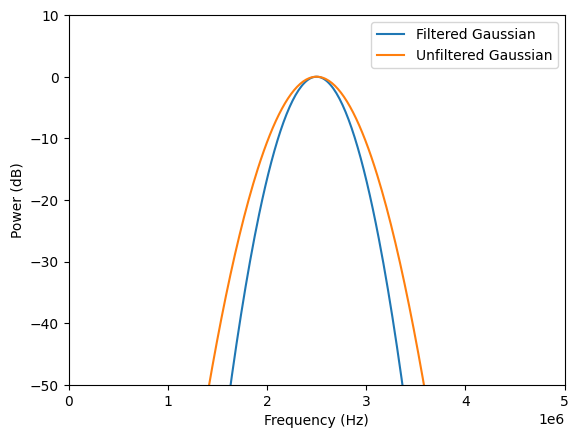

In [109]:
#Comparing Filtered and infiltered pulse in both time and frequency

Y_filtered = np.fft.fft(conv_sig, Nfft)
Y_i = np.fft.fft(i, Nfft)

Ps_Y_filtered = (1/Nfft) * np.abs(Y_filtered)**2
Ps_i = (1/Nfft) * np.abs(Y_i)**2
Ps_i_shifted = np.fft.fftshift(Ps_i)
Ps_Y_filtered_shiftet = np.fft.fftshift(Ps_Y_filtered)

Ps_Y_filtered_shiftet_dB = 10*np.log10(Ps_Y_filtered_shiftet + 1e-12)
Ps_i_shifted_dB = 10*np.log10(Ps_i_shifted + 1e-12)

Ps_Y_filtered_shiftet_dB_norm = Ps_Y_filtered_shiftet_dB - np.max(Ps_Y_filtered_shiftet_dB)
Ps_i_shifted_dB_norm = Ps_i_shifted_dB - np.max(Ps_i_shifted_dB)

plt.figure()

f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fs))
plt.plot(f, Ps_Y_filtered_shiftet_dB_norm, label="Filtered Gaussian")
plt.plot(f, Ps_i_shifted_dB_norm, label="Unfiltered Gaussian")
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylim(-50, 10)
plt.xlim(0, 5e6)
plt.legend()
plt.show()




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

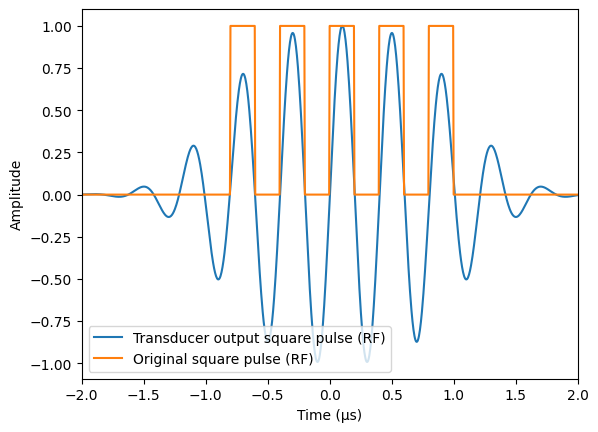

In [110]:
conv_sig_square = np.convolve(y_squared_windowed, h_i, mode='same')
conv_sig_square_norm = conv_sig_square / np.max(np.abs(conv_sig_square))
P_Y_conv_sig_squared_norm = 1/Nfft * np.abs(np.fft.fft(conv_sig_square_norm, Nfft))

plt.plot(t_vec*1e6, conv_sig_square_norm, label="Transducer output square pulse (RF)")
plt.plot(t_vec*1e6, y_squared_windowed, label="Original square pulse (RF) ")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(-2,2)
plt

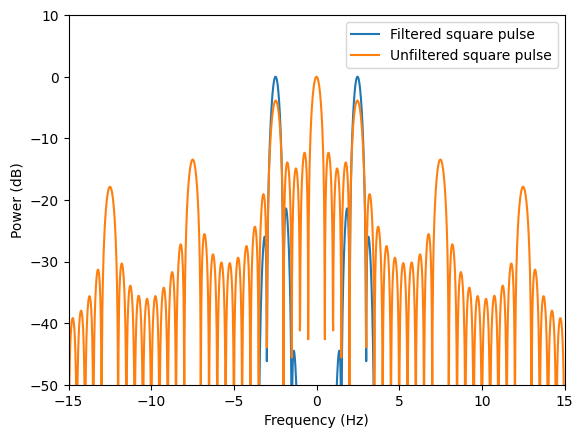

In [111]:
#Comparing filtered square power vs original square power

Y_filtered_square = np.fft.fft(conv_sig_square, Nfft)
Y_filtered_square_shiftet = np.fft.fftshift(Y_filtered_square)
Ps_Y_filtered_square = (1/Nfft) * np.abs(Y_filtered_square)**2
Ps_Y_filtered_square_shiftet = np.fft.fftshift(Ps_Y_filtered_square)
Ps_Y_filtered_square_shiftet_dB = 10*np.log10(Ps_Y_filtered_square_shiftet + 1e-12)
Psquare_filtered_normalized = Ps_Y_filtered_square_shiftet_dB - np.max(Ps_Y_filtered_square_shiftet_dB)

plt.plot(f/1e6, Psquare_filtered_normalized, label = "Filtered square pulse")
plt.plot(f/1e6, Ps_Y_square_shiftet_dB, label = "Unfiltered square pulse")
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylim(-50, 10)
plt.xlim(-15, 15)
plt.legend()
plt.show()

In [112]:
# Comments on results:

#After filtering by the transducer, the Gaussian pulse remains largely
# unchanged since its bandwidth is well matched to the transducer bandwidth.
# In contrast, the square pulse is significantly altered.
# Its high-frequency harmonics are suppressed by the bandpass characteristic
# of the transducer, resulting in a smoother, band-limited output centered at the transducer resonance frequency.
# This demonstrates that the transducer acts as a bandpass filter and that signals not matched to its bandwidth are strongly modified.

In [113]:
# Changing f0 to 4MHz

# If the transmit frequency is changed from 2.5 MHz to 4 MHz while the transducer
# remains centered at 2.5 MHz, the output amplitude decreases significantly
# since the transmitted signal lies outside the transducer bandwidth.
# This demonstrates that efficient transmission requires matching the transmit frequency to the transducer resonance frequency.